In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
DATADIR='/content/drive/MyDrive/TestData/test0'
CATEGORIES=["Alumininum","Copper","Iron","Manganese"]

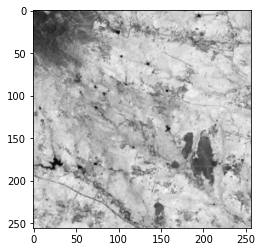

In [2]:
for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

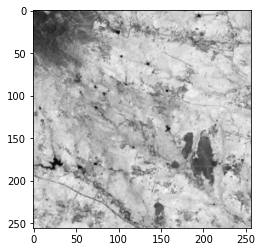

In [3]:
IMG_SIZE = 256

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

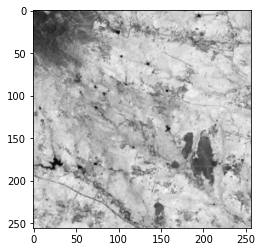

In [4]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [5]:
from tqdm import tqdm
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████| 280/280 [00:03<00:00, 82.45it/s] 

1240


In [6]:
import random

random.shuffle(training_data)

In [7]:
for sample in training_data[:10]:
    print(sample[1])

0
0
0
3
2
0
0
3
2
1


In [13]:
X = []
y = []
for features,label in training_data:
    X.append(features)
    y.append(label)


X = np.array(X).reshape(-1, 256, 256, 1)

print(X.shape)

(1240, 256, 256, 1)


In [14]:
import pickle

pickle_out = open("Xtest.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("ytest.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [ ]:
pickle_in = open("Xtest.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("ytest.pickle","rb")
y = pickle.load(pickle_in)